In [1]:
#import ipywidgets
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import clear_output

In [2]:
url = 'https://drive.google.com/file/d/1vuIGiBWieIcheFwg2HYMPN2R5I3KWEpX/view?usp=sharing'
path_tidy = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path_tidy)

In [3]:
df.head()

,event_Idx,period,periodTime,id_team_that_shot,name_team_that_shot,result_event,x_coord,y_coord,distance,angle,...,distance_from_last,seconds_since_last,rebound,angle_change,speed,type_season,id_game,season,team_away_name,team_home_name
0,9,1,01:27,13,Florida Panthers,Shot,-35.0,31.0,63.134776,-0.513252,...,55.081757,12.0,False,0.000000,4.590146,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
1,12,1,01:55,13,Florida Panthers,Goal,-78.0,5.0,13.000000,-0.394791,...,19.235384,27.0,False,0.000000,0.712422,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
2,14,1,02:06,13,Florida Panthers,Shot,-83.0,-20.0,21.189620,1.234122,...,85.375641,11.0,False,0.000000,7.761422,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
3,18,1,02:54,2,New York Islanders,Shot,48.0,25.0,48.877398,0.536911,...,29.681644,2.0,False,0.000000,14.840822,playoffs,2015030111,20152016,New York Islanders,Florida Panthers
4,19,1,02:59,13,Florida Panthers,Shot,-57.0,14.0,35.846897,-0.401229,...,105.574618,5.0,True,-0.222013,21.114924,playoffs,2015030111,20152016,New York Islanders,Florida Panthers


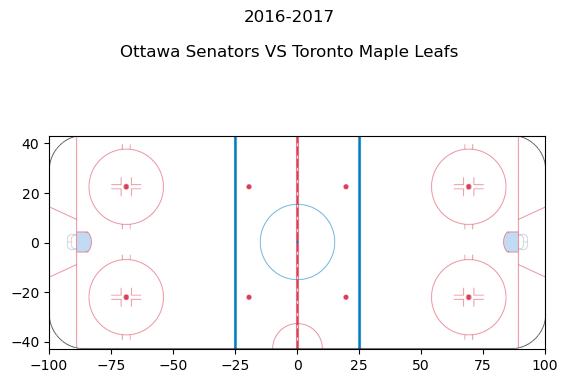

interactive(children=(Dropdown(description='season', index=1, options=(20152016, 20162017, 20172018, 20182019,…

In [4]:
#SET DEFAULT VALUES
season =  20162017
seasonW = Dropdown(options = df['season'].unique(), value = season)

game_type = 'regular_season'
game_typeW = Dropdown(options=['playoffs','regular_season'], value = game_type)
 
games = df[(df['season']==season) & (df['type_season']==game_type)]['id_game'].unique()
gameW = IntSlider(value = 0,min=0,max=len(games)-1,continuous_update=False)

events = df[(df['season']==season) & (df['type_season']==game_type) & (df['id_game']==games[0])]
eventW = IntSlider(value = 0,min=0,max=len(events)-1,continuous_update=False)

#INTERACTIF DEBUGGER
@interact(season = seasonW,game_type = game_typeW,game = gameW,event=eventW)
def debugger(season,game_type,game,event):
    
    #RESET GAMES
    games = df[(df['season']==season) & (df['type_season']==game_type)]['id_game'].unique()
    gameW.max = len(games) - 1
    
    if game > len(games):
        game = 0
        gameW.value = 0
        
    #RESET EVENTS
    events = df[(df['season']==season) & (df['type_season']==game_type) & (df['id_game']==games[game])]
    eventW.max =  len(events) - 1
    
    if event >  len(events):
        event = 0
        eventW.value = 0
        
    #GET INFO FOR THIS PARTICULAR EVENT
    event_infos = events.iloc[event]
    
    #PLOT BACKGROUND IMAGE
    fig, ax = plt.subplots()
    img = plt.imread("../figures/nhl_rink.png")
    ax.imshow(img, extent=[-100, 100, -43, 43])
    
    #SUPTITLE
    season_title = f'{str(season)[:4]}-{str(season)[4:]}'
    home = event_infos['team_home_name']
    away = event_infos['team_away_name']
   
    plt.suptitle(f'{season_title}\n\n{home} VS {away}')
    
    #TITLE
    shot_type =  event_infos['shot_type']
    event_type =  event_infos['result_event']
    player =  event_infos['shooter_name']
     
    plt.title(f'A {shot_type} of {player}: {event_type}')
   
   
    #PLOT POINT AT THE LOCATION OF THE EVENT
    x =  event_infos['x_coord']
    y =  event_infos['y_coord']
    ax.scatter(x, y, marker='o', color='r', label='point')
    
    #REMOVE PAST PLOTS IF ANY
    clear_output(wait=True)